In [37]:
%config Completer.use_jedi = False

import pandas as pd
import numpy as np

import os

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.stats import pearsonr
sns.set_palette('YlGnBu', 3)

In [73]:
ercc = pd.read_csv('../data/external/cms_095046.txt',
                  sep='\t', header=0, index_col=1)

In [74]:
dirnames = os.listdir('../results/demultiplexed-ercc/exp2/')
try:
    dirnames.remove('.DS_Store')
except:
    pass

In [89]:
meta = pd.read_csv('../data/all_new_data/Drop_2nd_exp_NHD_file_sample_barcode_list.csv',
                     sep=',', header=0, index_col=None).iloc[:15]
meta['r'] = 0.0
meta['n'] = [500]*5 + [250]*5 + [125]*5

In [90]:
for i in meta.index:
    name = meta.loc[i, 'sequencing_file'].split('-')[0].split('_')[-1]
    data = pd.read_csv('../results/demultiplexed-ercc/exp2/jemultiplexer.out.%s/DMSO_DMSO_CCAATATGTGGCGGCAGATTCGGCT/abundance.tsv' % name,
                  sep='\t', header=0, index_col=0)
    meta.loc[i, 'r'] = pearsonr(np.log2(data.loc[ercc.index]['tpm']+1),
                               np.log2(ercc['concentration in Mix 1 (attomoles/ul)']))[0]

In [91]:
meta

,sequencing_file,Drug,Barcode,r,n
0,K5PHY_Drop1_22s000062-1-1_Du_lane122s000062,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.807689,500
1,K5PHY_Drop2_22s000063-1-1_Du_lane122s000063,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.766566,500
2,K5PHY_Drop3_22s000064-1-1_Du_lane122s000064,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.774242,500
3,K5PHY_Drop4_22s000065-1-1_Du_lane122s000065,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.785051,500
4,K5PHY_Drop5_22s000066-1-1_Du_lane122s000066,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.794121,500
5,K5PHY_Drop6_22s000067-1-1_Du_lane122s000067,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.717767,250
6,K5PHY_Drop7_22s000068-1-1_Du_lane122s000068,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.710779,250
7,K5PHY_Drop8_22s000069-1-1_Du_lane122s000069,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.772222,250
8,K5PHY_Drop9_22s000070-1-1_Du_lane122s000070,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.711847,250
9,K5PHY_Drop10_22s000071-1-1_Du_lane122s000071,DMSO_DMSO,CCAATATGTGgcggcAGATTCGGCT,0.740847,250


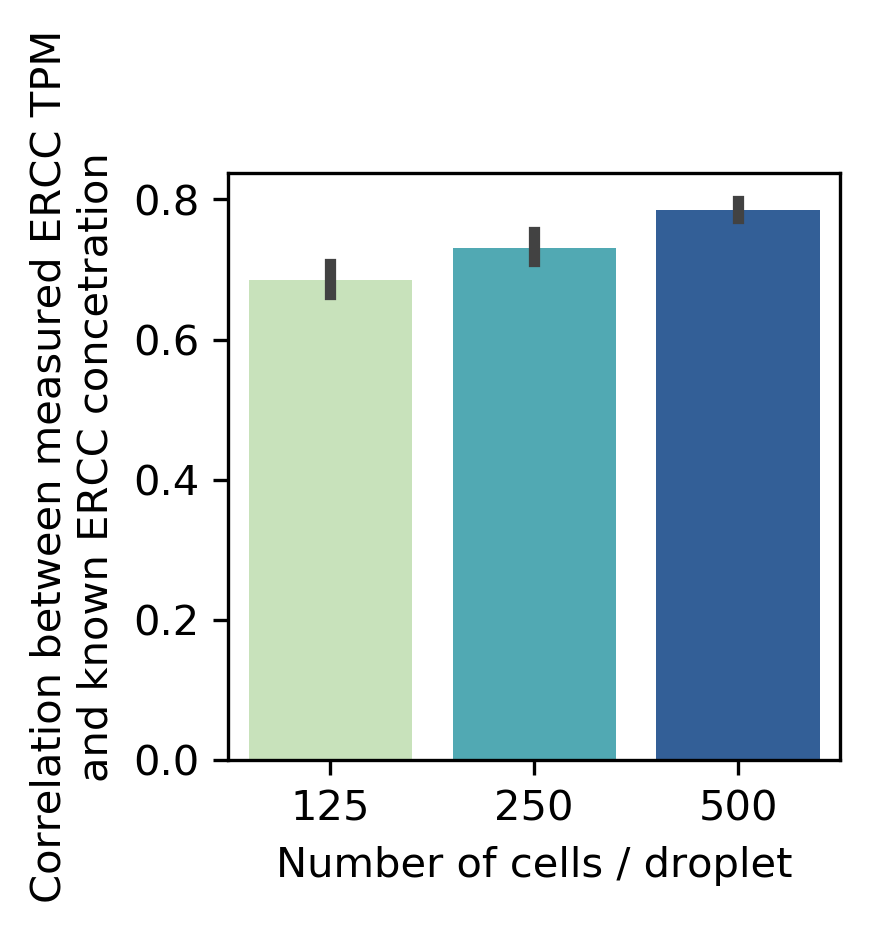

In [92]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('YlGnBu', 3)
sns.barplot(x='n', y='r', data=meta)
plt.xlabel('Number of cells / droplet')
plt.ylabel('Correlation between measured ERCC TPM\nand known ERCC concetration')
plt.tight_layout()
#plt.savefig('../figures/new/ERCC-summary.pdf')

/Users/benceszalai/opt/anaconda3/envs/pycharm/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


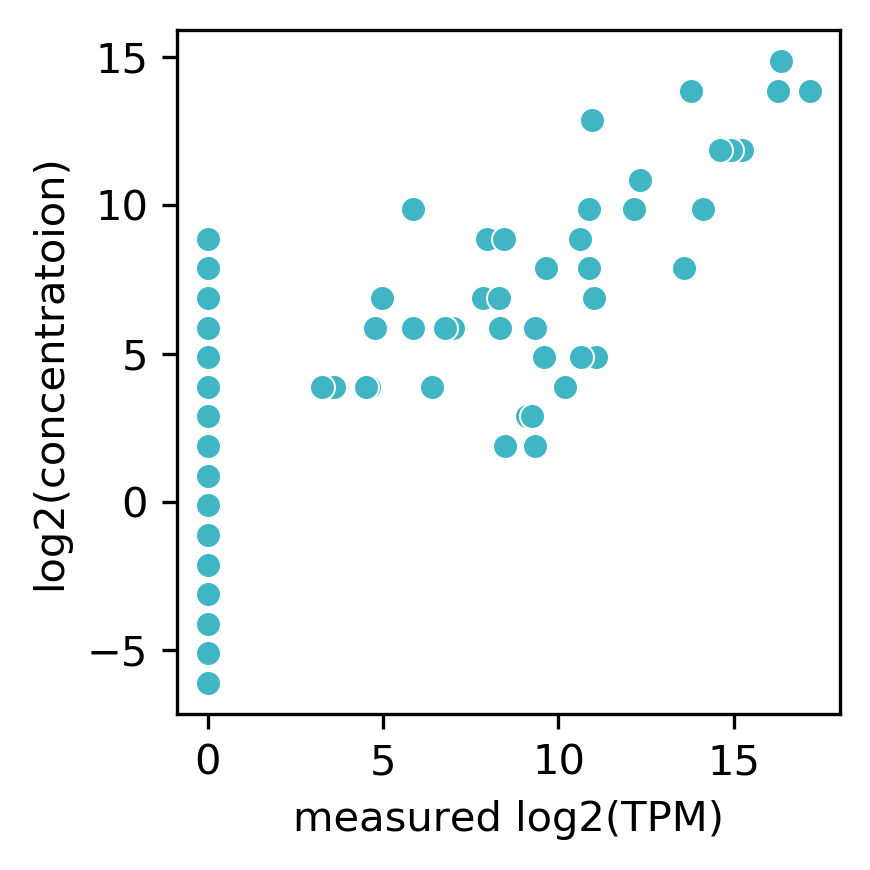

In [94]:
plt.figure(figsize=(3,3), dpi=300)
sns.set_palette('YlGnBu', 1)
i = 0
name = meta.loc[i, 'sequencing_file'].split('-')[0].split('_')[-1]
data = pd.read_csv('../results/demultiplexed-ercc/exp2/jemultiplexer.out.%s/DMSO_DMSO_CCAATATGTGGCGGCAGATTCGGCT/abundance.tsv' % name,
                  sep='\t', header=0, index_col=0)
sns.scatterplot(np.log2(data.loc[ercc.index]['tpm']+1), np.log2(ercc['concentration in Mix 1 (attomoles/ul)']))
plt.xlabel('measured log2(TPM)')
plt.ylabel('log2(concentratoion)')
plt.tight_layout()
plt.savefig('../figures/new/ERCC-example.pdf')

In [71]:
ercc.shape

(92, 7)